In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import morton
import numpy as np

In [2]:
# Useful boundary values in ascending order
17179869184 # (2^34) (smallest number that requires 35 bits)
28087995466 # (lane change 31 min right outlier morton value)
28612409360 # (lane change 31 max morton value)

### Methods for morton value list creation ###
# Method 1: create list containing morton values in specified range
# morton_range_list = list(range(min_bound,max_bound))
# Method 2: create list containing morton values in specified range but with specified increase_step
# morton_range_list = np.arange(min_bound, max_bound, increase_step).tolist()

### Variables for morton value list creation ###
# range of morton values to cover (how many elements if using method 1)
# value_range
# increase step (how many elements if using method 2)
# increase_step


28612409360

In [3]:
# morton boundaries right outliers:
min_bound = 17179869184 # (2^34)
max_bound = 28612409360 # (lane change 31 max morton value)

##### variables changed throughout experiment #####
# range width of morton values to cover
value_range = 1000000000
# increase step
increase_step = 131072*2*2*2
# determine new max_bound for testing
max_bound = min_bound + value_range
# create list containing morton_values in specified range
#morton_range_list = list(range(min_bound,max_bound))
morton_range_list = np.arange(min_bound, max_bound, increase_step).tolist()



In [4]:
###### TEST 0 #####
#min_bound = 17179869184 # (2^34)
#min_bound = 28087995466 # (lane change 31 min right outlier morton value)

max_bound = 28612409360 # (lane change 31 max morton value)
# range width of morton values to cover
value_range = 32


# change the area interested
#min_bound += 10000000000
# determine new max_bound for testing
max_bound = min_bound + value_range
# create list containing morton_values in specified range
morton_range_list = list(range(min_bound, (max_bound+1)))


In [5]:
# TEST 1: EXPONENTIAL GROWTH

# increase step
increase_step = 1

# create list containing morton_values in specified range
morton_range_list = np.arange(min_bound, max_bound, increase_step).tolist()

for i in range(0, (len(morton_range_list))):
    morton_range_list[i] = min_bound + increase_step
    increase_step *= 2

In [6]:
# TEST 2: EXP. GROWTH IN FIRST HALF, EXP. DECREASE SECOND HALF

# increase step is a large power of 2 to show exp. growth with fewer steps
increase_step = 65536

# create list containing morton_values in specified range
morton_range_list = np.arange(min_bound, max_bound, increase_step).tolist()

# add values 
for i in range(0, (int(len(morton_range_list)/2))):
    morton_range_list[i] = min_bound + increase_step
    increase_step *= 2
for i in range((int(len(morton_range_list)/2)), (len(morton_range_list))):
    morton_range_list[i] = min_bound + increase_step
    increase_step /= 2

In [7]:
# TEST 3: EXP. GROWTH WITH INCREASE STEP 3

# increase step
increase_step = 3

for i in range(0, (len(morton_range_list))):
    morton_range_list[i] = min_bound + increase_step
    increase_step *= 4

In [8]:
# TEST 4: BELL SHAPE TEST

# increase step is a large power of 2 to show exp. growth with fewer steps
increase_step = 65536*2*16

for i in range(0, (int(len(morton_range_list)/2))):
    morton_range_list[i] = min_bound + increase_step
    increase_step /= 2
for i in range((int(len(morton_range_list)/2)), (len(morton_range_list))):
    morton_range_list[i] = min_bound + increase_step
    increase_step *= 2

In [40]:
# TEST 5: LINEAR GROWTH USING LC31 OUTLIER BOUNDARIES
min_bound = 28087995466 # (lane change 31 min right outlier morton value)
#min_bound = 17179869184 # (2^34)
#min_bound = 10000000000 # (2^34)
max_bound = 28735866149 # (lane change 31 max right outlier morton value)

#value_range = (max_bound - min_bound)
#max_bound = min_bound + value_range

# create list containing morton_values in specified range
#morton_range_list = list(range(min_bound, (max_bound+1)))

# increase step
increase_step = 10000000

morton_range_list = np.arange(min_bound, max_bound, increase_step).tolist()


In [10]:
# TEST 6: BIT SHIFTING
# increase step
min_bound = 2
increase_step = 3

for i in range(0, (len(morton_range_list))):
    morton_range_list[i] = min_bound + increase_step
    # a << n == a * 2^n
    increase_step *= 2**2

In [11]:
# TEST 7: EXP. GROWTH IN FIRST HALF, EXP. DECREASE SECOND HALF WITH POWER OF 4

# increase step is a large power of 2 to show exp. growth with fewer steps
increase_step = 65536

# create list containing morton_values in specified range
#morton_range_list = list(range(min_bound,max_bound))
morton_range_list = np.arange(min_bound, max_bound, increase_step).tolist()

for i in range(0, (int(len(morton_range_list)/2))):
    morton_range_list[i] = min_bound + increase_step
    increase_step = int(increase_step * 4)
for i in range((int(len(morton_range_list)/2)), (len(morton_range_list))):
    morton_range_list[i] = min_bound + increase_step
    increase_step = int(increase_step / 4)

OverflowError: integer division result too large for a float

In [41]:
##### DATAFRAME CREATION #####

# create df containing morton values in the range
df_morton_analysis = pd.DataFrame(morton_range_list, columns=['morton'])

# add sensor columns that will contain unpacked data
df_morton_analysis[['IMULatAcceleration', 'SteeringWhlAngle']] = 0

# specify morton encoding
m = morton.Morton(dimensions=2, bits=18)

# iterate through df_morton_analysis
for i in range(0, len(df_morton_analysis.index)):
    # extract current sensor_values
    sensor_values = m.unpack(int(df_morton_analysis.loc[i,['morton']]))
    # put sensor_values in appropriate column and index
    df_morton_analysis.loc[i, ['IMULatAcceleration']] = sensor_values[0]
    df_morton_analysis.loc[i, ['SteeringWhlAngle']] = sensor_values[1]

df_morton_analysis

,morton,IMULatAcceleration,SteeringWhlAngle
0,28087995466,131752,112291
1,28097995466,134024,112731
2,28107995466,139224,111331
3,28117995466,138808,114107
4,28127995466,140072,109395
...,...,...,...
60,28687995466,146504,125971
61,28697995466,139272,129771
62,28707995466,143736,128115
63,28717995466,144888,130699


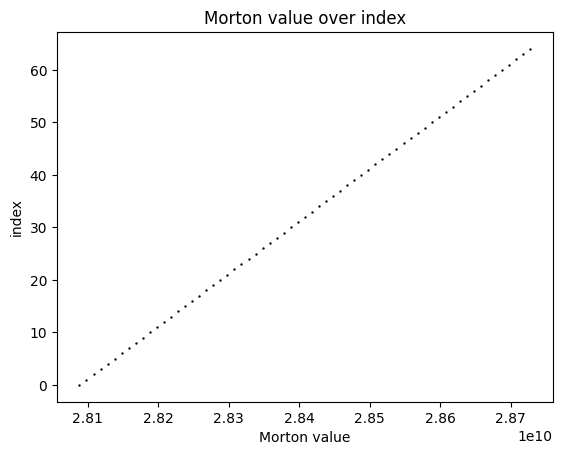

In [46]:
plt.scatter(x=df_morton_analysis['morton'],y=df_morton_analysis.index, c='black', s=0.5)
plt.title("Morton value over index")
plt.xlabel("Morton value")
plt.ylabel("index")
plt.show()

In [44]:
OFFSET = 10
FACTOR_MULTIPLY = 10000


df_morton_analysis['IMULatAcceleration'] = df_morton_analysis.apply(lambda x: (x['IMULatAcceleration']/FACTOR_MULTIPLY) , axis=1)
df_morton_analysis['SteeringWhlAngle'] = df_morton_analysis.apply(lambda x: (x['SteeringWhlAngle']/FACTOR_MULTIPLY) , axis=1)

df_morton_analysis['IMULatAcceleration']=df_morton_analysis['IMULatAcceleration'].add(-OFFSET)
df_morton_analysis['SteeringWhlAngle']=df_morton_analysis['SteeringWhlAngle'].add(-OFFSET)

<Axes: title={'center': 'Lateral acceleration and Steering angle against index'}, xlabel='index', ylabel='Steering Angle (°) | Lateral Acceleration (m/s²)'>

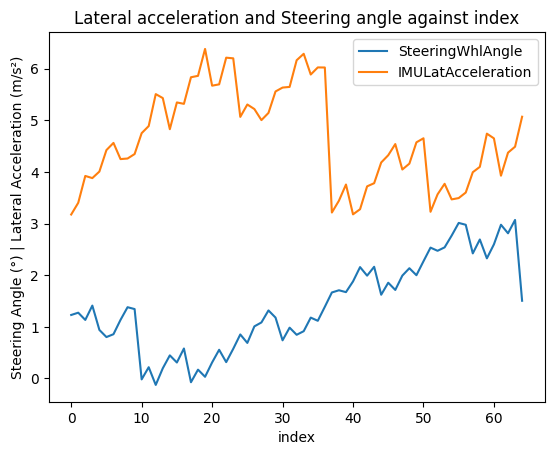

In [45]:
df_morton_analysis.plot(y=['SteeringWhlAngle', 'IMULatAcceleration'], title='Lateral acceleration and Steering angle against index', xlabel='index', ylabel='Steering Angle (°) | Lateral Acceleration (m/s\u00B2)', use_index=True)